<a href="https://colab.research.google.com/github/paruliansaragi/DL-Notebooks/blob/master/Shoe_or_Jacket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is just a sandbox kernel using data collected online and the fast.ai library.

In [0]:
import os

In [0]:
os.makedirs('data/jackshoe/', exist_ok=True)

In [0]:
!mv valid {PATH}

In [0]:
!rm {PATH}train.zip

In [0]:
PATH = 'data/jackshoe/'

In [0]:
!ls

data  sample_data  test.zip


In [0]:
!unzip {PATH}train.zip

Archive:  data/jackshoe/train.zip
   creating: test/jacket/
  inflating: test/jacket/jacket51.jpeg  
  inflating: test/jacket/jacket52.jpeg  
  inflating: test/jacket/jacket56.jpeg  
   creating: test/shoe/
  inflating: test/shoe/shoe16.jpeg   
  inflating: test/shoe/shoe17.jpg    
  inflating: test/shoe/shoe18.jpeg   
   creating: train/jacket/
  inflating: train/jacket/jacket.jpeg  
  inflating: train/jacket/jacket1.jpeg  
  inflating: train/jacket/jacket3.jpeg  
  inflating: train/jacket/jacket4.jpeg  
  inflating: train/jacket/jacket5.jpeg  
   creating: train/shoe/
  inflating: train/shoe/shoe.jpg     
  inflating: train/shoe/shoe2.jpeg   
  inflating: train/shoe/shoe3.jpeg   
  inflating: train/shoe/shoe4.jpeg   
   creating: valid/jacket/
  inflating: valid/jacket/jacke8.jpeg  
  inflating: valid/jacket/jacket7.jpeg  
   creating: valid/shoe/
  inflating: valid/shoe/shoe8.jpeg   
  inflating: valid/shoe/shoe9.jpeg   


In [0]:
!unzip "data/jackshoe/test.zip"


Archive:  data/jackshoe/test.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data/jackshoe/test.zip or
        data/jackshoe/test.zip.zip, and cannot find data/jackshoe/test.zip.ZIP, period.


In [0]:
!ls

data  sample_data


In [0]:
!unzip valid.zip

Archive:  valid.zip
  inflating: valid/jacke8.jpeg       
  inflating: valid/jacket7.jpeg      
  inflating: valid/shoe8.jpeg        
  inflating: valid/shoe9.jpeg        


In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip install fastai

    100% |████████████████████████████████| 122kB 6.2MB/s 
    100% |████████████████████████████████| 184kB 8.3MB/s 
    100% |████████████████████████████████| 3.6MB 918kB/s 
    100% |████████████████████████████████| 61kB 25.7MB/s 
    100% |████████████████████████████████| 496.4MB 33kB/s 
    100% |████████████████████████████████| 1.5MB 6.4MB/s 
    100% |████████████████████████████████| 2.2MB 1.3MB/s 
    100% |████████████████████████████████| 112kB 26.2MB/s 
    100% |████████████████████████████████| 51kB 22.4MB/s 
    100% |████████████████████████████████| 92kB 27.1MB/s 
    100% |████████████████████████████████| 112kB 28.9MB/s 
    100% |████████████████████████████████| 71kB 25.9MB/s 
    100% |████████████████████████████████| 901kB 2.8MB/s 
    100% |████████████████████████████████| 11.6MB 1.9MB/s 
    100% |████████████████████████████████| 81kB 21.1MB/s 
    100% |████████████████████████████████| 1.5MB 6.9MB/s 
    100% |████████████████████████████████| 4.4MB 3.

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


sz=224

In [0]:
os.makedirs('/cache/tmp', exist_ok=True)
!ln -fs /cache/tmp {PATH}

In [0]:
!rm {PATH}valid/shoe9.jpeg

In [0]:
!ls {PATH}valid

jacket	shoe


In [0]:
files = !ls {PATH}valid | head
files

['jacket', 'shoe']

In [0]:
!rm -rf {PATH}tmp

In [0]:
PATH

'data/cricbase_15train/'

In [0]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.1, 10)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 22580716.89it/s]


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


epoch      trn_loss   val_loss   accuracy   
    0      1.16108    0.296845   0.75      
    1      0.583904   0.216275   0.75      
    2      0.386006   0.111816   1.0       
    3      0.287362   0.035744   1.0       
    4      0.227568   0.009367   1.0       
    5      0.187745   0.002363   1.0       
    6      0.159292   0.000648   1.0       
    7      0.1381     0.000192   1.0       
    8      0.121597   6.6e-05    1.0       
    9      0.108911   2.2e-05    1.0       



[array([0.00002]), 1.0]

In [0]:
data.val_y

array([0, 0, 1, 1])

In [0]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['jacket', 'shoe']

In [0]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(4, 2)

In [0]:
log_preds[:10]

array([[ -0.     , -14.42189],
       [ -0.     , -12.64067],
       [-10.81407,  -0.00002],
       [ -9.63452,  -0.00007]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)
probs

array([0.     , 0.     , 0.99998, 0.99993], dtype=float32)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


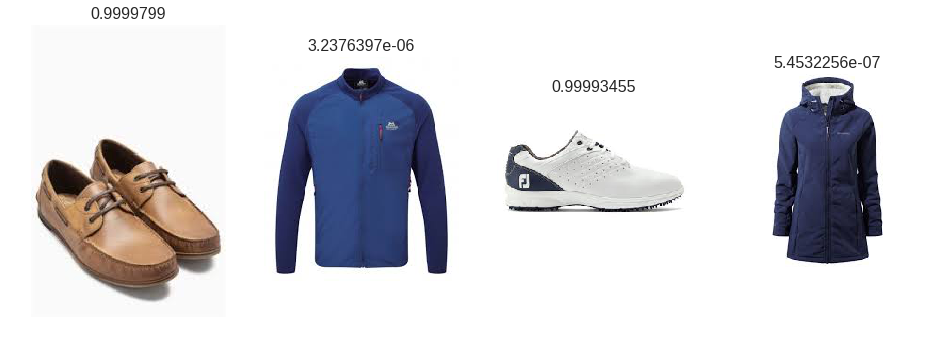

In [0]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct Jacket guesses


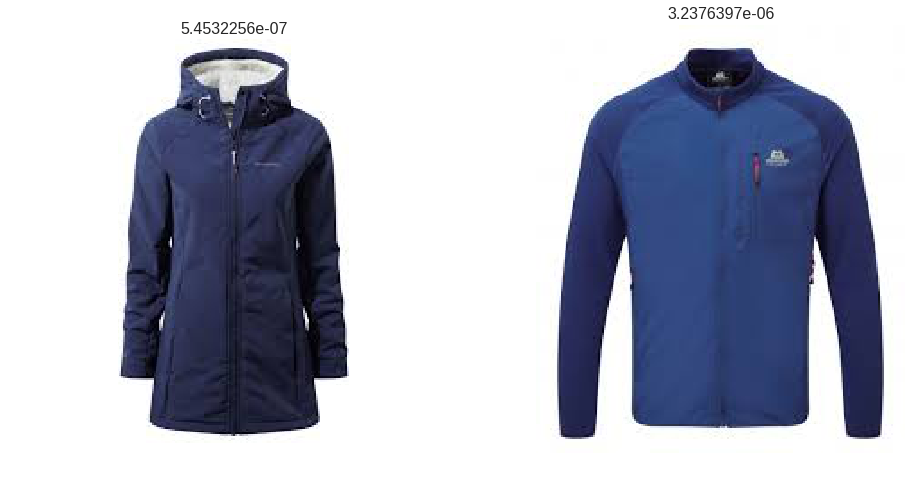

In [0]:
plot_val_with_title(most_by_correct(0, True), "Most correct Jacket guesses")

Most correct Shoe guesses


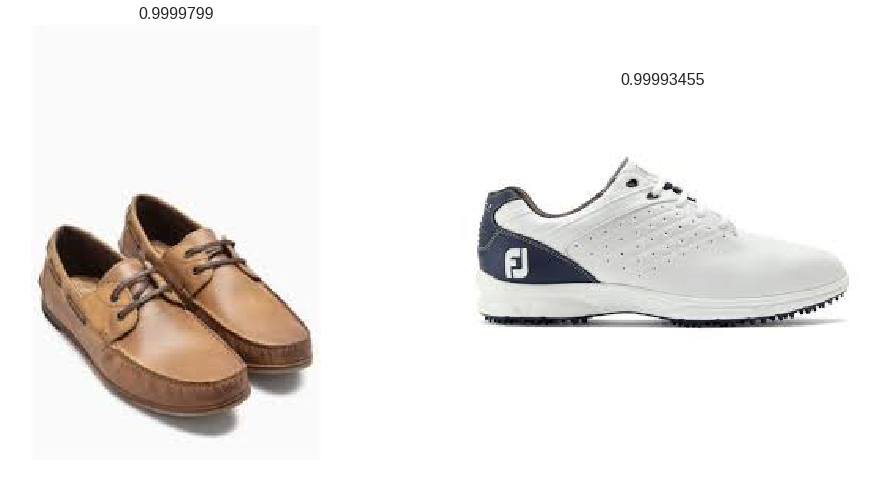

In [0]:
plot_val_with_title(most_by_correct(1, True), "Most correct Shoe guesses")

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect Jacket guesses")

Most incorrect Jacket guesses


In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect shoe guesses")

Most incorrect shoe guesses


Most uncertain predictions


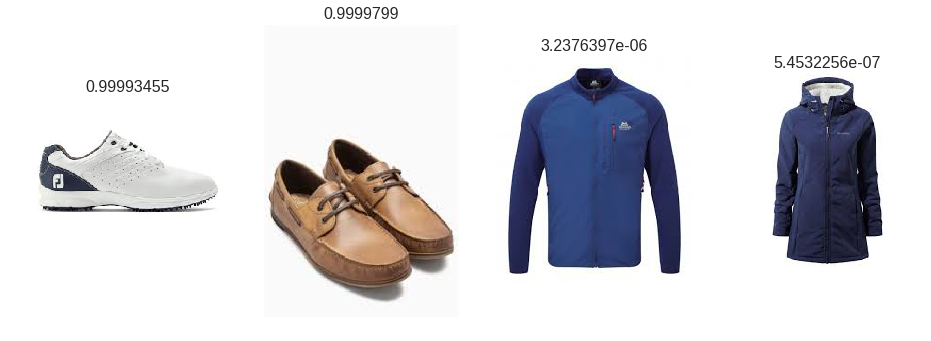

In [0]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   accuracy   
    0      1.20239    0.497648   0.75      



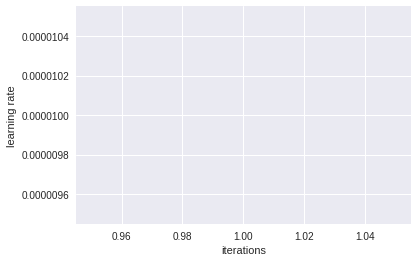

In [0]:
learn.sched.plot_lr()

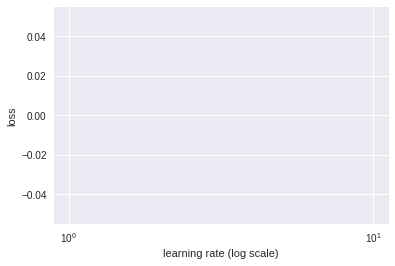

In [0]:
learn.sched.plot()

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

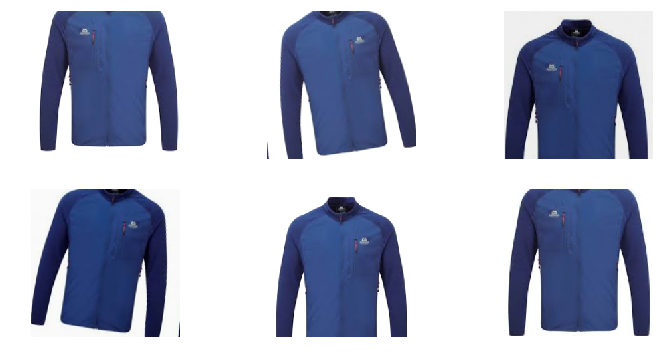

In [0]:
plots(ims, rows=2)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      1.332021   0.696411   0.5       



[array([0.69641]), 0.5]

In [0]:
learn.precompute=False

In [0]:
learn.fit(1e-1, 10, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.148567   0.692847   0.5       
    1      0.911647   0.714993   0.5       
    2      0.801432   0.001252   1.0       
    3      0.594983   0.001501   1.0       
    4      0.471197   1.8e-05    1.0       
    5      0.388646   3.7e-05    1.0       
    6      0.329715   2e-06      1.0       
    7      0.285529   3e-06      1.0       
    8      0.251181   1e-06      1.0       
    9      0.223734   1e-06      1.0       



[array([0.]), 1.0]

What is that cycle_len parameter? What we've done here is used a technique called stochastic gradient descent with restarts (SGDR), a variant of learning rate annealing, which gradually decreases the learning rate as training progresses. This is helpful because as we get closer to the optimal weights, we want to take smaller steps.

However, we may find ourselves in a part of the weight space that isn't very resilient - that is, small changes to the weights may result in big changes to the loss. We want to encourage our model to find parts of the weight space that are both accurate and stable. Therefore, from time to time we increase the learning rate (this is the 'restarts' in 'SGDR'), which will force the model to jump to a different part of the weight space if the current area is "spikey". Here's a picture of how that might look if we reset the learning rates 3 times (in this paper they call it a "cyclic LR schedule"):

![alt text](https://github.com/coderbee/fastai/raw/106dbb87c5c734f23aa6fcfaa5b353a5979c16b0/courses/dl1/images/sgdr.png)

The number of epochs between resetting the learning rate is set by cycle_len, and the number of times this happens is refered to as the number of cycles, and is what we're actually passing as the 2nd parameter to fit(). So here's what our actual learning rates looked like:

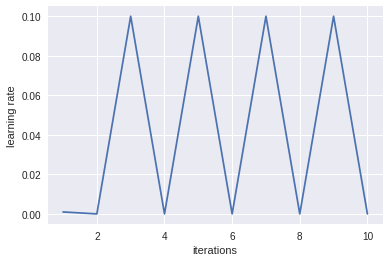

In [0]:
learn.sched.plot_lr()

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

In [0]:
learn.unfreeze()

In [0]:
lr=np.array([1e-4,1e-2,1e-1])

In [0]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)


epoch      trn_loss   val_loss   accuracy   
    0      0.000779   2e-06      1.0       
    1      0.000411   4e-06      1.0       
    2      0.000351   1.1e-05    1.0       
    3      0.001884   3e-05      1.0       
    4      0.029627   5.8e-05    1.0       
    5      0.024459   0.00021    1.0       
    6      0.020751   0.000571   1.0       
    7      0.017971   0.002319   1.0       
    8      0.015817   0.007855   1.0       
    9      0.014088   0.015321   1.0       
    10     0.013341   0.056889   1.0       
    11     0.012108   0.086695   1.0       
    12     0.012105   0.125848   1.0       
    13     0.011123   0.190512   0.75      
    14     0.011086   0.072389   1.0       



[array([0.07239]), 1.0]

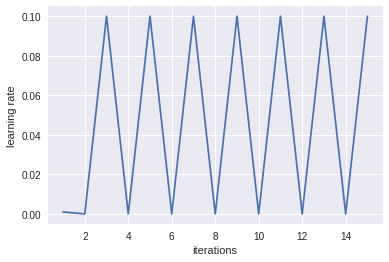

In [0]:
learn.sched.plot_lr()

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

In [0]:
log_predslog_pred ,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [0]:
accuracy_np(probs, y)

0.75

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[1 1]
 [0 2]]


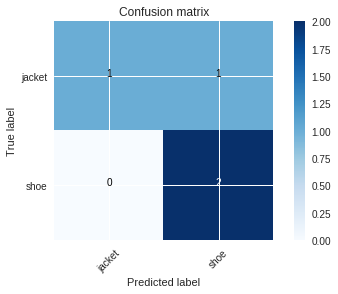

In [0]:
plot_confusion_matrix(cm, data.classes)

Most incorrect Shoe


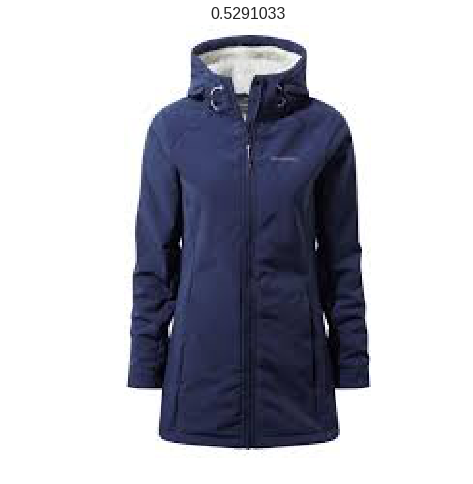

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect Shoe")


Most incorrect jackets


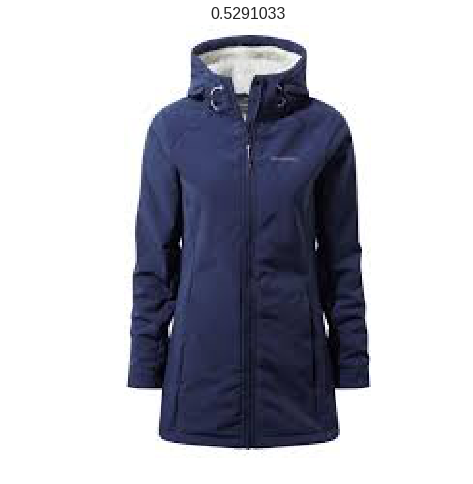

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect jackets")


Note that in our toy example above our accuracy is 100% and our loss is 0.16. Compare that to a loss of 0.03 that we are getting while predicting cats and dogs. Exercise: play with preds to get a lower loss for this example.

Example: Here is an example on how to compute the loss for one example of binary classification problem. Suppose for an image x with label 1 and your model gives it a prediction of 0.9. For this case the loss should be small because our model is predicting a label $1$ with high probability.

loss = -log(0.9) = 0.10

Now suppose x has label 0 but our model is predicting 0.9. In this case our loss should be much larger.

loss = -log(1-0.9) = 2.30

Exercise: look at the other cases and convince yourself that this make sense.
Exercise: how would you rewrite binary_loss using if instead of * and +?
Why not just maximize accuracy? The binary classification loss is an easier function to optimize.

In [0]:
if  -log(preds) > 0.5: loss = high else loss = low